$$
\newcommand{\si}{\sigma}
\newcommand{\Ga}{\Gamma}
\DeclareMathOperator{\argmax}{argmax}
$$


Introductory lecture to networks, random networks, visualizations, simple statistics etc...


#Graphs vs Networks

Engineers talk about networks having nodes and links between nodes. Mathematicians talk about graphs having vertices and edges between vertices.

They're the same thing. In this class we will use the engineering lingo but the mathematics notation. So we will say that a network $G=(V,E)$ has nodes $V$, usually labeled as $V=\{1,2,\dots,N\}$ and links $E$ consisting of ordered or unurodered pairs of nodes, depending whther the network is directed or indirected. At times, we might also consider a weight function $\si: E\rightarrow (0,\infty)$ and referred to a weighted network in this case.


## Example: A grid.

Here is code to generate a simple planar grid. In this case, understanding this network amounts to drawing it. A look tells us everything we would want to know about it.

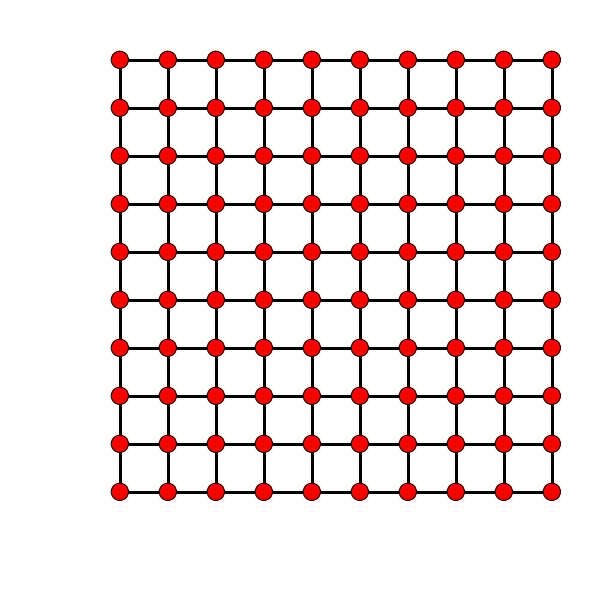

In [2]:
% matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,8)

G = nx.grid_2d_graph(10,10)

pos = dict(zip(G,G)) # dictionary of node names->positions

nx.draw(G,pos,with_labels=False,width = 3.0
       # node_size = 150
       )

In [2]:
print G.nodes()

[(7, 3), (6, 9), (0, 7), (1, 6), (3, 7), (2, 5), (8, 5), (5, 8), (4, 0), (9, 0), (6, 7), (5, 5), (7, 6), (0, 4), (1, 1), (3, 2), (2, 6), (8, 2), (4, 5), (9, 3), (6, 0), (7, 5), (0, 1), (3, 1), (9, 9), (7, 8), (2, 1), (8, 9), (9, 4), (5, 1), (7, 2), (1, 5), (3, 6), (2, 2), (8, 6), (4, 1), (9, 7), (6, 4), (5, 4), (7, 1), (0, 5), (1, 0), (0, 8), (3, 5), (2, 7), (8, 3), (4, 6), (9, 2), (6, 1), (5, 7), (7, 4), (0, 2), (1, 3), (4, 8), (3, 0), (2, 8), (9, 8), (8, 0), (6, 2), (5, 0), (1, 4), (3, 9), (2, 3), (1, 9), (8, 7), (4, 2), (9, 6), (6, 5), (5, 3), (7, 0), (6, 8), (0, 6), (1, 7), (0, 9), (3, 4), (2, 4), (8, 4), (5, 9), (4, 7), (9, 1), (6, 6), (5, 6), (7, 7), (0, 3), (1, 2), (4, 9), (3, 3), (2, 9), (8, 1), (4, 4), (6, 3), (0, 0), (7, 9), (3, 8), (2, 0), (1, 8), (8, 8), (4, 3), (9, 5), (5, 2)]


In [3]:
zip(G,G)

[((7, 3), (7, 3)),
 ((6, 9), (6, 9)),
 ((0, 7), (0, 7)),
 ((1, 6), (1, 6)),
 ((3, 7), (3, 7)),
 ((2, 5), (2, 5)),
 ((8, 5), (8, 5)),
 ((5, 8), (5, 8)),
 ((4, 0), (4, 0)),
 ((9, 0), (9, 0)),
 ((6, 7), (6, 7)),
 ((5, 5), (5, 5)),
 ((7, 6), (7, 6)),
 ((0, 4), (0, 4)),
 ((1, 1), (1, 1)),
 ((3, 2), (3, 2)),
 ((2, 6), (2, 6)),
 ((8, 2), (8, 2)),
 ((4, 5), (4, 5)),
 ((9, 3), (9, 3)),
 ((6, 0), (6, 0)),
 ((7, 5), (7, 5)),
 ((0, 1), (0, 1)),
 ((3, 1), (3, 1)),
 ((9, 9), (9, 9)),
 ((7, 8), (7, 8)),
 ((2, 1), (2, 1)),
 ((8, 9), (8, 9)),
 ((9, 4), (9, 4)),
 ((5, 1), (5, 1)),
 ((7, 2), (7, 2)),
 ((1, 5), (1, 5)),
 ((3, 6), (3, 6)),
 ((2, 2), (2, 2)),
 ((8, 6), (8, 6)),
 ((4, 1), (4, 1)),
 ((9, 7), (9, 7)),
 ((6, 4), (6, 4)),
 ((5, 4), (5, 4)),
 ((7, 1), (7, 1)),
 ((0, 5), (0, 5)),
 ((1, 0), (1, 0)),
 ((0, 8), (0, 8)),
 ((3, 5), (3, 5)),
 ((2, 7), (2, 7)),
 ((8, 3), (8, 3)),
 ((4, 6), (4, 6)),
 ((9, 2), (9, 2)),
 ((6, 1), (6, 1)),
 ((5, 7), (5, 7)),
 ((7, 4), (7, 4)),
 ((0, 2), (0, 2)),
 ((1, 3), (1

In [4]:
dict(zip(G,G))

{(0, 0): (0, 0),
 (0, 1): (0, 1),
 (0, 2): (0, 2),
 (0, 3): (0, 3),
 (0, 4): (0, 4),
 (0, 5): (0, 5),
 (0, 6): (0, 6),
 (0, 7): (0, 7),
 (0, 8): (0, 8),
 (0, 9): (0, 9),
 (1, 0): (1, 0),
 (1, 1): (1, 1),
 (1, 2): (1, 2),
 (1, 3): (1, 3),
 (1, 4): (1, 4),
 (1, 5): (1, 5),
 (1, 6): (1, 6),
 (1, 7): (1, 7),
 (1, 8): (1, 8),
 (1, 9): (1, 9),
 (2, 0): (2, 0),
 (2, 1): (2, 1),
 (2, 2): (2, 2),
 (2, 3): (2, 3),
 (2, 4): (2, 4),
 (2, 5): (2, 5),
 (2, 6): (2, 6),
 (2, 7): (2, 7),
 (2, 8): (2, 8),
 (2, 9): (2, 9),
 (3, 0): (3, 0),
 (3, 1): (3, 1),
 (3, 2): (3, 2),
 (3, 3): (3, 3),
 (3, 4): (3, 4),
 (3, 5): (3, 5),
 (3, 6): (3, 6),
 (3, 7): (3, 7),
 (3, 8): (3, 8),
 (3, 9): (3, 9),
 (4, 0): (4, 0),
 (4, 1): (4, 1),
 (4, 2): (4, 2),
 (4, 3): (4, 3),
 (4, 4): (4, 4),
 (4, 5): (4, 5),
 (4, 6): (4, 6),
 (4, 7): (4, 7),
 (4, 8): (4, 8),
 (4, 9): (4, 9),
 (5, 0): (5, 0),
 (5, 1): (5, 1),
 (5, 2): (5, 2),
 (5, 3): (5, 3),
 (5, 4): (5, 4),
 (5, 5): (5, 5),
 (5, 6): (5, 6),
 (5, 7): (5, 7),
 (5, 8): (5, 8

If pos had not be defined, nx.draw would have assumed pos = nx.spring_layout(G) and would have drawn the grid like this. 

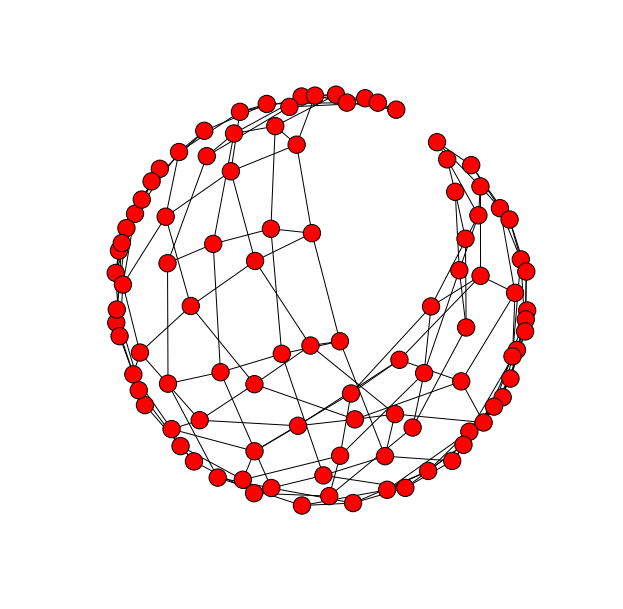

In [5]:
pos = nx.spring_layout(G)

nx.draw(G,pos,with_labels=False)

This is not a very informative drawing. We don't even see that G is a grid. The question of whether a drawing is informative or not is not a well-defined question mathematically.

# The SNAP Library


## 1. Collaboration graphs (huge).

We look at a co-authorship graph called dblp, which comes from the <a href="http://snap.stanford.edu/snap/">SNAP library</a>. Nodes are authors and links between authors are weighted by the number of paper co-authored.

In [3]:
dblp = nx.read_edgelist('com-dblp.ungraph.txt.gz', comments='#')

The command .size() returns the number of edges in the graph.

In [7]:
dblp.size()

1049866

In [8]:
len(dblp.nodes())

317080

In [4]:
del dblp

## 2. Facebook.

Click on the <a href="http://snap.stanford.edu/data/egonets-Facebook.html">link</a> to read about this network.

In [5]:
facebook = nx.read_edgelist('facebook_combined.txt.gz')

In [6]:
facebook.size()

88234

In [7]:
len(facebook.nodes())

4039

In [9]:
deg = facebook.degree()

print deg

{u'1200': 4, u'3162': 57, u'4026': 9, u'1869': 15, u'4024': 1, u'4025': 4, u'4022': 1, u'4023': 18, u'4020': 8, u'4021': 11, u'4028': 2, u'4029': 2, u'344': 9, u'345': 16, u'346': 27, u'347': 7, u'340': 6, u'341': 12, u'342': 34, u'343': 18, u'3997': 11, u'3996': 4, u'3995': 9, u'3994': 11, u'348': 229, u'349': 5, u'3991': 3, u'3990': 4, u'1511': 30, u'1653': 74, u'512': 29, u'1564': 16, u'2318': 37, u'2319': 122, u'2316': 10, u'2317': 36, u'2314': 19, u'2315': 73, u'2312': 16, u'2313': 85, u'2310': 23, u'2311': 51, u'298': 11, u'299': 20, u'296': 7, u'297': 25, u'294': 3, u'295': 10, u'292': 1, u'293': 3, u'290': 14, u'291': 36, u'3773': 14, u'3772': 8, u'3771': 7, u'3770': 10, u'3777': 10, u'3776': 19, u'3775': 9, u'3774': 18, u'3779': 19, u'3778': 13, u'270': 4, u'271': 73, u'272': 45, u'273': 9, u'274': 14, u'275': 10, u'276': 18, u'277': 65, u'278': 10, u'279': 2, u'1992': 15, u'738': 25, u'2814': 2, u'2268': 130, u'2269': 1, u'2262': 14, u'2263': 7, u'2260': 20, u'2261': 129, u'2

In [10]:
max(deg.values())

1045

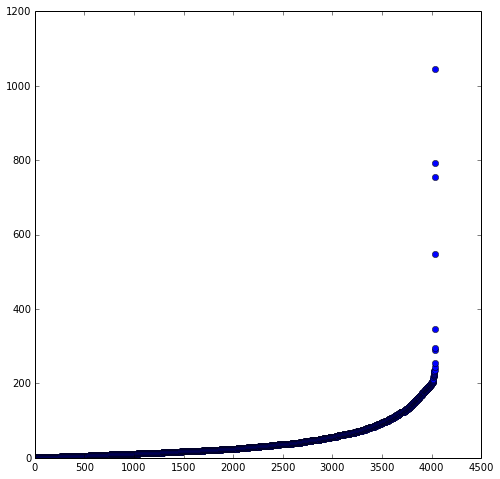

In [12]:
plt.plot(sorted(deg.values()), 'o')

plt.show()

Zooming in to lower degrees.

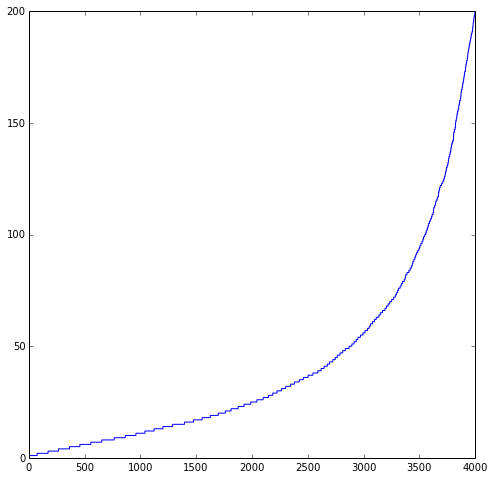

In [13]:
plt.plot(sorted(deg.values()))

plt.axis([0, 4000, 0, 200])
plt.show()

In [14]:
del facebook

## 3. Amazon.

The vertices of the graph <a href="http://snap.stanford.edu/data/amazon0302.html"> amazon </a> are products sold by Amazon, and edges appear between products
that are often purchased together.

If a product i is frequently co-purchased with product j, the graph contains a directed edge from i to j.

In [3]:
amazon = nx.read_edgelist('amazon0302.txt.gz')

In [4]:
adeg = amazon.degree()

In [5]:
max(adeg.values())

420

In this case, products are organized into a hierarchy, and
we know the sets in the hierarchy. The edges in the graph mostly go between vertices in the same
part of the hierarchy.

In [0]:
del amazon

# Epicenter

<a href=http://ece.k-state.edu/epicenter_wiki/index.php/Products> Epicenter</a> is a continuing NSF-funded interdisciplinary effort at Kansas State University (might change name soon), lead by Profs. Nathan Albin and Pietro Poggi-Corradini in Math, and Prof. Caterina Scoglio in ECE.  



* Adjnoun: This is the network of common adjective and noun
adjacencies for the novel "David Copperfield" by Charles Dickens, as
described by M. Newman.  Nodes represent the most commonly occurring
adjectives and nouns in the book. Edges connect any pair of words 
that occur in adjacent position
in the text of the book. \cite{newman2006finding}

* Power: An undirected unweighted representation of the
topology of the western states power grid of the United States 
compiled by Watts and Strogatz \cite{watts1998collective}. 

* Karate:  The network of friendships between the 34 members 
of a karate club at a US university, just before the club split, 
as described by Wayne Zachary \cite{zachary1977information}.

* Football: The football network, compiled by Girvan and 
Newman \cite{girvan2002community}, is a network of American football 
games between Division I colleges. A link between two teams represents 
that a game was played between the two teams during the fall of 2000 season.

* Dolphins:  The network contains an undirected social network of frequent
associations between 62 dolphins in a community living off Doubtful Sound,
New Zealand, as compiled by Lusseau \cite{lusseau2003bottlenose}.

* High Energy Physics Collaboration (HEP):  The collaboration network of scientists
posting preprints on the high-energy physics to the archive at www.arxiv.org during
1995-1999, as compiled by Newman \cite{newman2001structure}.

*  Lesmis:  The weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables". Nodes represent
characters in the novel and edges connect any pair of
characters that appear in the same chapter of the book.  \cite{knuth1993stanford}

* Polblogs: Political blogosphere Feb. 2005 
Data compiled by Adamic and Glance \cite{adamic2005political}. Links between 
blogs were automatically extracted from a crawl of the front page of the blog.


* Netscience:  A coauthorship network of scientists 
working on network theory and experiment, as compiled by Newman  
\cite{newman2006finding}.  The network was compiled from the 
bibliographies of two review articles on networks, with a few additional 
references added by hand.  The version used here contains just the
largest component of 379 scientists. 

* Facebook:   This dataset consists of `friends lists' from Facebook. 
Facebook data was collected from survey participaants using the Facebook app 
and their information was anonymized. The original data set has 4,039 nodes 
and 88,234 edges. We looked at a cluster of only approximately 3,000 edges. 
This data was compiled by Leskovec and McAuely and used in \cite{leskovec2012learning}.


* General Relativity and Quantum Cosmology Collaboration (GRQC):  This graph 
represents the collaboration network in General Relativity and Quantum Cosmology 
from e-prints on arXiv during the period January 1993 to April 2003 (124 months). 
This data was compiled by Leskovec, Kleinberg, and Faloutsos and used in \cite{leskovec2007graph}.




# Geometric Graphs.

## Threshold graphs.

Each dots may represent a cell-phone tower and we assume that each tower cover the same radius. However, their location is random.

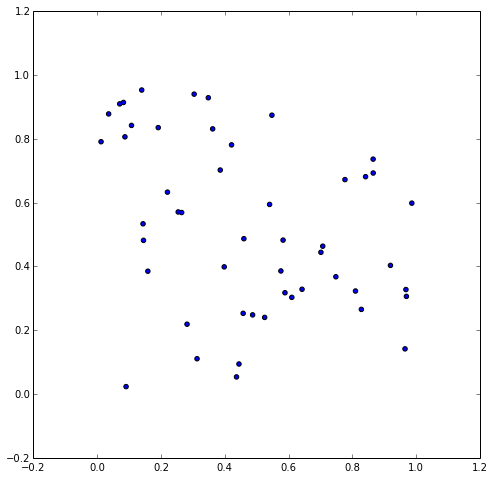

In [15]:
import numpy as np
import random as rd

plt.rcParams['figure.figsize'] = (8,8)
#plt.figure(figsize=(8,8))
    
    
N=50    

x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(x, y)
plt.show()

In [16]:
%run circles.ipynb

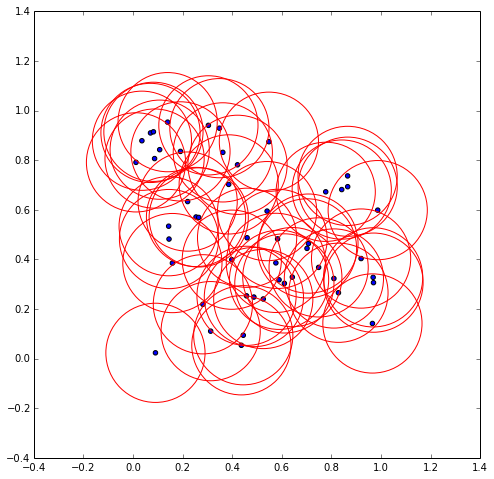

In [17]:
#plt.figure(figsize=(8,8))

plt.scatter(x, y)

circles(x, y, 0.2, facecolor='none', edgecolor='r')

plt.show()

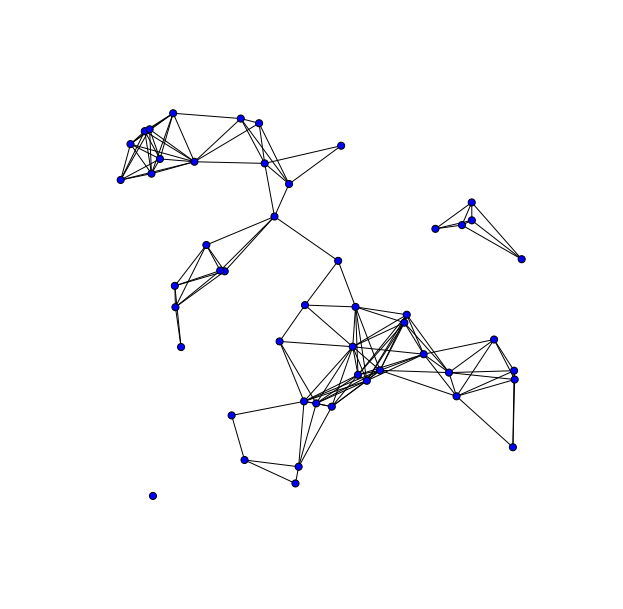

In [18]:
from math import sqrt

geometric = nx.Graph()


z = zip(x,y) # list of positions



#add nodes

for p in z:
    geometric.add_node(p)
    

#add edges

for i in range(N):
    for j in range(i+1,N):
        if sqrt((z[i][0]-z[j][0])**2+(z[i][1]-z[j][1])**2)<0.2:
            geometric.add_edge(z[i],z[j])
    
pos = dict(zip(geometric,geometric)) # dictionary of node names->positions

nx.draw(geometric,pos,with_labels=False,width = 1.0, node_size = 50, node_color='b')


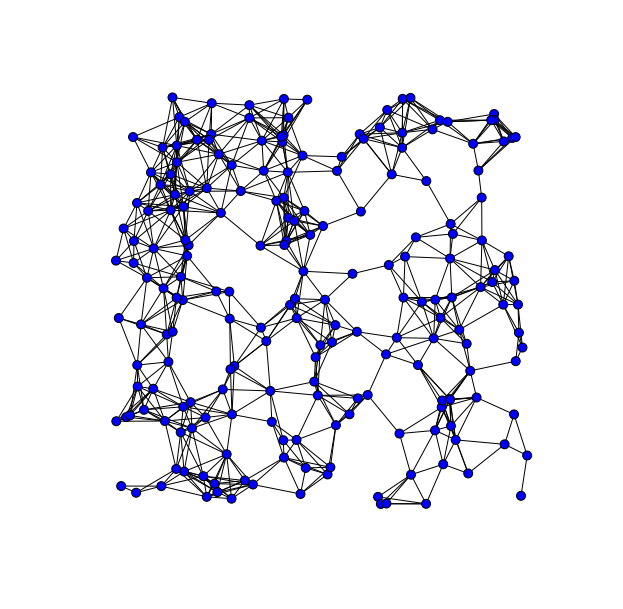

In [19]:
G=nx.random_geometric_graph(200,0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')



plt.figure(figsize=(8,8))

# nx.draw_networkx_edges(G,pos,nodelist=[ncenter])
# nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
#                        node_size=80,
#                        node_color='b')

nx.draw(G,pos,node_size=80,node_color='b', with_labels=False)

plt.axis('off')
plt.savefig('random_geometric_graph.png')
plt.show()

## $k$-nearest neighbor graph

Here we connect each dot the its $k$ nearest neighbors. These graphs are usually connected. And, they typically have many fewer edges
than similar connected graphs in which connectivity is determined by circles. It might be preferable to construct a nearest neighbor graph when the typical distances between vertices differ in different parts of the data set.

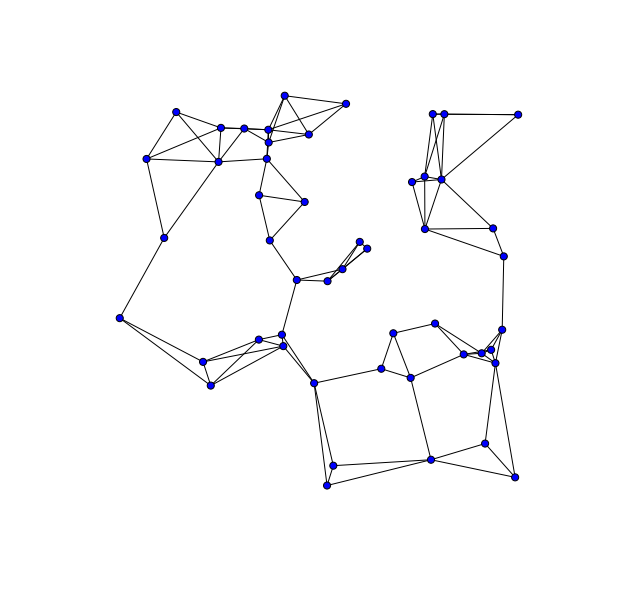

In [11]:
knearest = nx.Graph()

k=3  # k is the number of nearest neighbors

# Recall that z = zip(x,y)  is list of positions

#add nodes
for p in z:
    knearest.add_node(p)
    
#add edges
for i in range(len(z)):
    d = []
    
    for j in range(len(z)):
        d.append(sqrt((z[i][0]-z[j][0])**2+(z[i][1]-z[j][1])**2))
        
    index = np.argsort(d)

    for r in range(k+1):
        knearest.add_edge(z[i],z[index[r]])
    
pos = dict(zip(knearest,knearest)) # dictionary of node names->positions

nx.draw(knearest,pos,with_labels=False,width = 1.0, node_size = 50, node_color='b')


Or use meshgrid

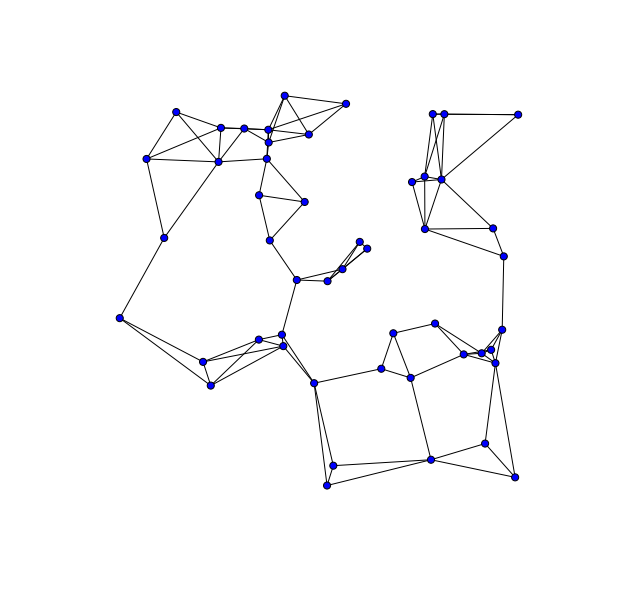

In [12]:
knearest = nx.Graph()


k=3  # k is the number of nearest neighbors


# compute the matrix of distances


from numpy import meshgrid, sqrt, Inf

# compare X coordinates
X1,X2 = meshgrid(x,x)
DX = X1-X2

# compare Y coordinates
Y1,Y2 = meshgrid(y,y)
DY = Y1-Y2

# compute the distances between pairs of points
D = sqrt( DX**2 + DY**2 )

# create some indices to work with
I,J = meshgrid( range(N), range(N) )

# D contains duplicate information, remove the lower part from consideration
#D[I<=J] = Inf

# Recall that z = zip(x,y)  is list of positions

#add nodes
for p in z:
    knearest.add_node(p)
    

    
#add edges

for i in range(len(z)):
        
    index = np.argsort(D[i])

    for r in range(k+1):
        knearest.add_edge(z[i],z[index[r]])
    
pos = dict(zip(knearest,knearest)) # dictionary of node names->positions

nx.draw(knearest,pos,with_labels=False,width = 1.0, node_size = 50, node_color='b')

## Exercise: Hand-written digits.

The <a href=http://yann.lecun.com/exdb/mnist/>MNIST database</a> of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

Figure out how to extract the information in the file of images below. For each image concatenate the rows to get a high dimensional vector. The form the $3$-nearest neighbor graph of these vectors. The images are labeled from 0 to 9. Look at how many edges stay inside the set of vertices corresponding to images labeled 1, and compare it to how many edges leave that set.

In [74]:
%load t10k-images-idx3-ubyte.gz

The text you're trying to load seems pretty big (1648848 characters). Continue (y/[N]) ? N
Operation cancelled.


# Percolation

## Bond percolation

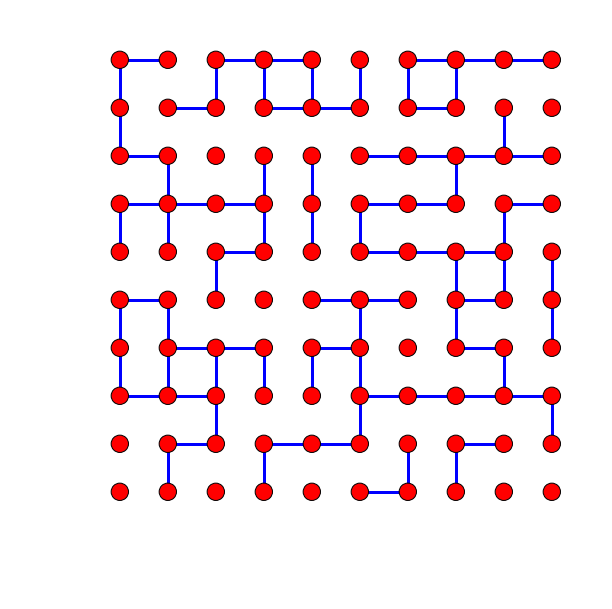

In [15]:
for e in G.edges():
    G[e[0]][e[1]]['weight'] = np.random.uniform(0,1)  #Recall is D is a dictionary you can assign
                                                      #the value $v$ to the key $k$ by saying
                                                      #D[v] = k.

#print(G.edges(data = True))

    if G[e[0]][e[1]]['weight'] < 0.5:
        G[e[0]][e[1]]['color'] = 'blue'
    else:
        G[e[0]][e[1]]['color'] = 'white'
        
e_colors = [ G[e[0]][e[1]]['color'] for e in G.edges() ]

nx.draw(G, pos,with_labels=False, edge_color = e_colors, width = 3.0)

## Site percolation

Consider a triangular grid with regular triangles. Picking a node $a$ and coloring the six triangles that share a vertex at $a$ creates a regular hexagon. The coloring can then be propagated to the whole lattice by reflection, in a checkerboard fashion with white tiles alternating with black tiles. Connecting the centers of these hexagons again produces a triangular lattice, so coloring the hexagonal tiles is equivalent to coloring the nodes of a triangular lattice. In particular, this can be done in a random fashion, as below. 

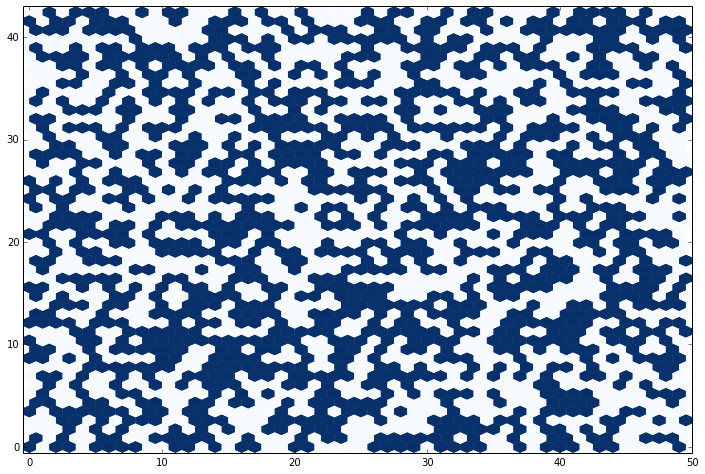

In [2]:
%run 'Draw Hex Tiles.ipynb'